<a href="https://colab.research.google.com/github/Miller76lite/GEOL558/blob/main/Supervised_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!pip install seaborn==0.13.2

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [27]:
Data = pd.read_csv('https://raw.githubusercontent.com/Miller76lite/GEOL558/main/Data1.csv')

In [28]:
Data.shape

(4162, 13)

In [29]:
Data.describe()

,long,lat,SiO2n,TiO2n,Al2O3n,FeO*n,MnOn,MgOn,CaOn,Na2On,K2On
count,4118.000000,4118.000000,4135.000000,4135.000000,4135.000000,4135.000000,3980.000000,4135.000000,4135.000000,4134.000000,4135.000000
mean,-122.193137,45.541801,58.595127,1.164000,16.801287,7.430377,0.141910,3.679231,7.099359,3.556638,1.296281
std,0.432682,1.270632,6.917297,0.487531,1.588845,2.580065,0.142415,2.112921,2.741486,0.752476,0.953438
min,-123.249000,41.656000,45.420000,0.000000,3.230000,0.110000,0.000000,0.000000,0.000000,0.020000,0.000000
25%,-122.533075,44.652000,53.375000,0.850000,15.870000,5.810000,0.100000,2.340000,5.380000,3.110000,0.640000
50%,-122.254250,46.099000,56.990000,1.150000,16.830000,7.870000,0.140000,3.570000,7.460000,3.560000,1.030000
75%,-121.881000,46.375800,62.580000,1.440000,17.760000,9.150000,0.170000,4.725000,9.040000,4.030000,1.650000
max,-120.531700,48.358300,83.730000,3.640000,25.040000,16.380000,6.150000,16.680000,18.130000,7.000000,9.580000


In [30]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4162 entries, 0 to 4161
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   rock_name  4122 non-null   object 
 1   long       4118 non-null   float64
 2   lat        4118 non-null   float64
 3   SiO2n      4135 non-null   float64
 4   TiO2n      4135 non-null   float64
 5   Al2O3n     4135 non-null   float64
 6   FeO*n      4135 non-null   float64
 7   MnOn       3980 non-null   float64
 8   MgOn       4135 non-null   float64
 9   CaOn       4135 non-null   float64
 10  Na2On      4134 non-null   float64
 11  K2On       4135 non-null   float64
 12  P2O5n      3920 non-null   object 
dtypes: float64(11), object(2)
memory usage: 422.8+ KB


In [31]:
data_cleaned = Data.copy()  # Create a copy to avoid modifying the original DataFrame

# Drop rows with blank cells in the 'rock_name' column
data_cleaned = data_cleaned.dropna(subset=['rock_name'])

# Reset the index after dropping rows
data_cleaned = data_cleaned.reset_index(drop=True)

In [32]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4122 entries, 0 to 4121
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   rock_name  4122 non-null   object 
 1   long       4116 non-null   float64
 2   lat        4116 non-null   float64
 3   SiO2n      4122 non-null   float64
 4   TiO2n      4122 non-null   float64
 5   Al2O3n     4122 non-null   float64
 6   FeO*n      4122 non-null   float64
 7   MnOn       3967 non-null   float64
 8   MgOn       4122 non-null   float64
 9   CaOn       4122 non-null   float64
 10  Na2On      4121 non-null   float64
 11  K2On       4122 non-null   float64
 12  P2O5n      3907 non-null   object 
dtypes: float64(11), object(2)
memory usage: 418.8+ KB


In [34]:
# Calculate the number of columns in the original DataFrame
original_rows = Data.shape[0]

# Calculate the number of columns in the cleaned DataFrame
cleaned_rows = data_cleaned.shape[0]

# Calculate the number of columns dropped
dropped_rows = original_rows - cleaned_rows

# Print the result
print(f"Number of rows dropped due to empty cells/missing data: {dropped_rows}")

Number of rows dropped due to empty cells/missing data: 40


In [38]:
# Check for missing values after cleaning
print("Missing values after cleaning:\n", data_cleaned.isnull().sum())
# Select numerical features
numerical_features = data_cleaned.select_dtypes(include=np.number).columns
data_cleaned_numerical = data_cleaned[numerical_features]

Missing values after cleaning:
 rock_name      0
long           6
lat            6
SiO2n          0
TiO2n          0
Al2O3n         0
FeO*n          0
MnOn         155
MgOn           0
CaOn           0
Na2On          1
K2On           0
P2O5n        215
dtype: int64


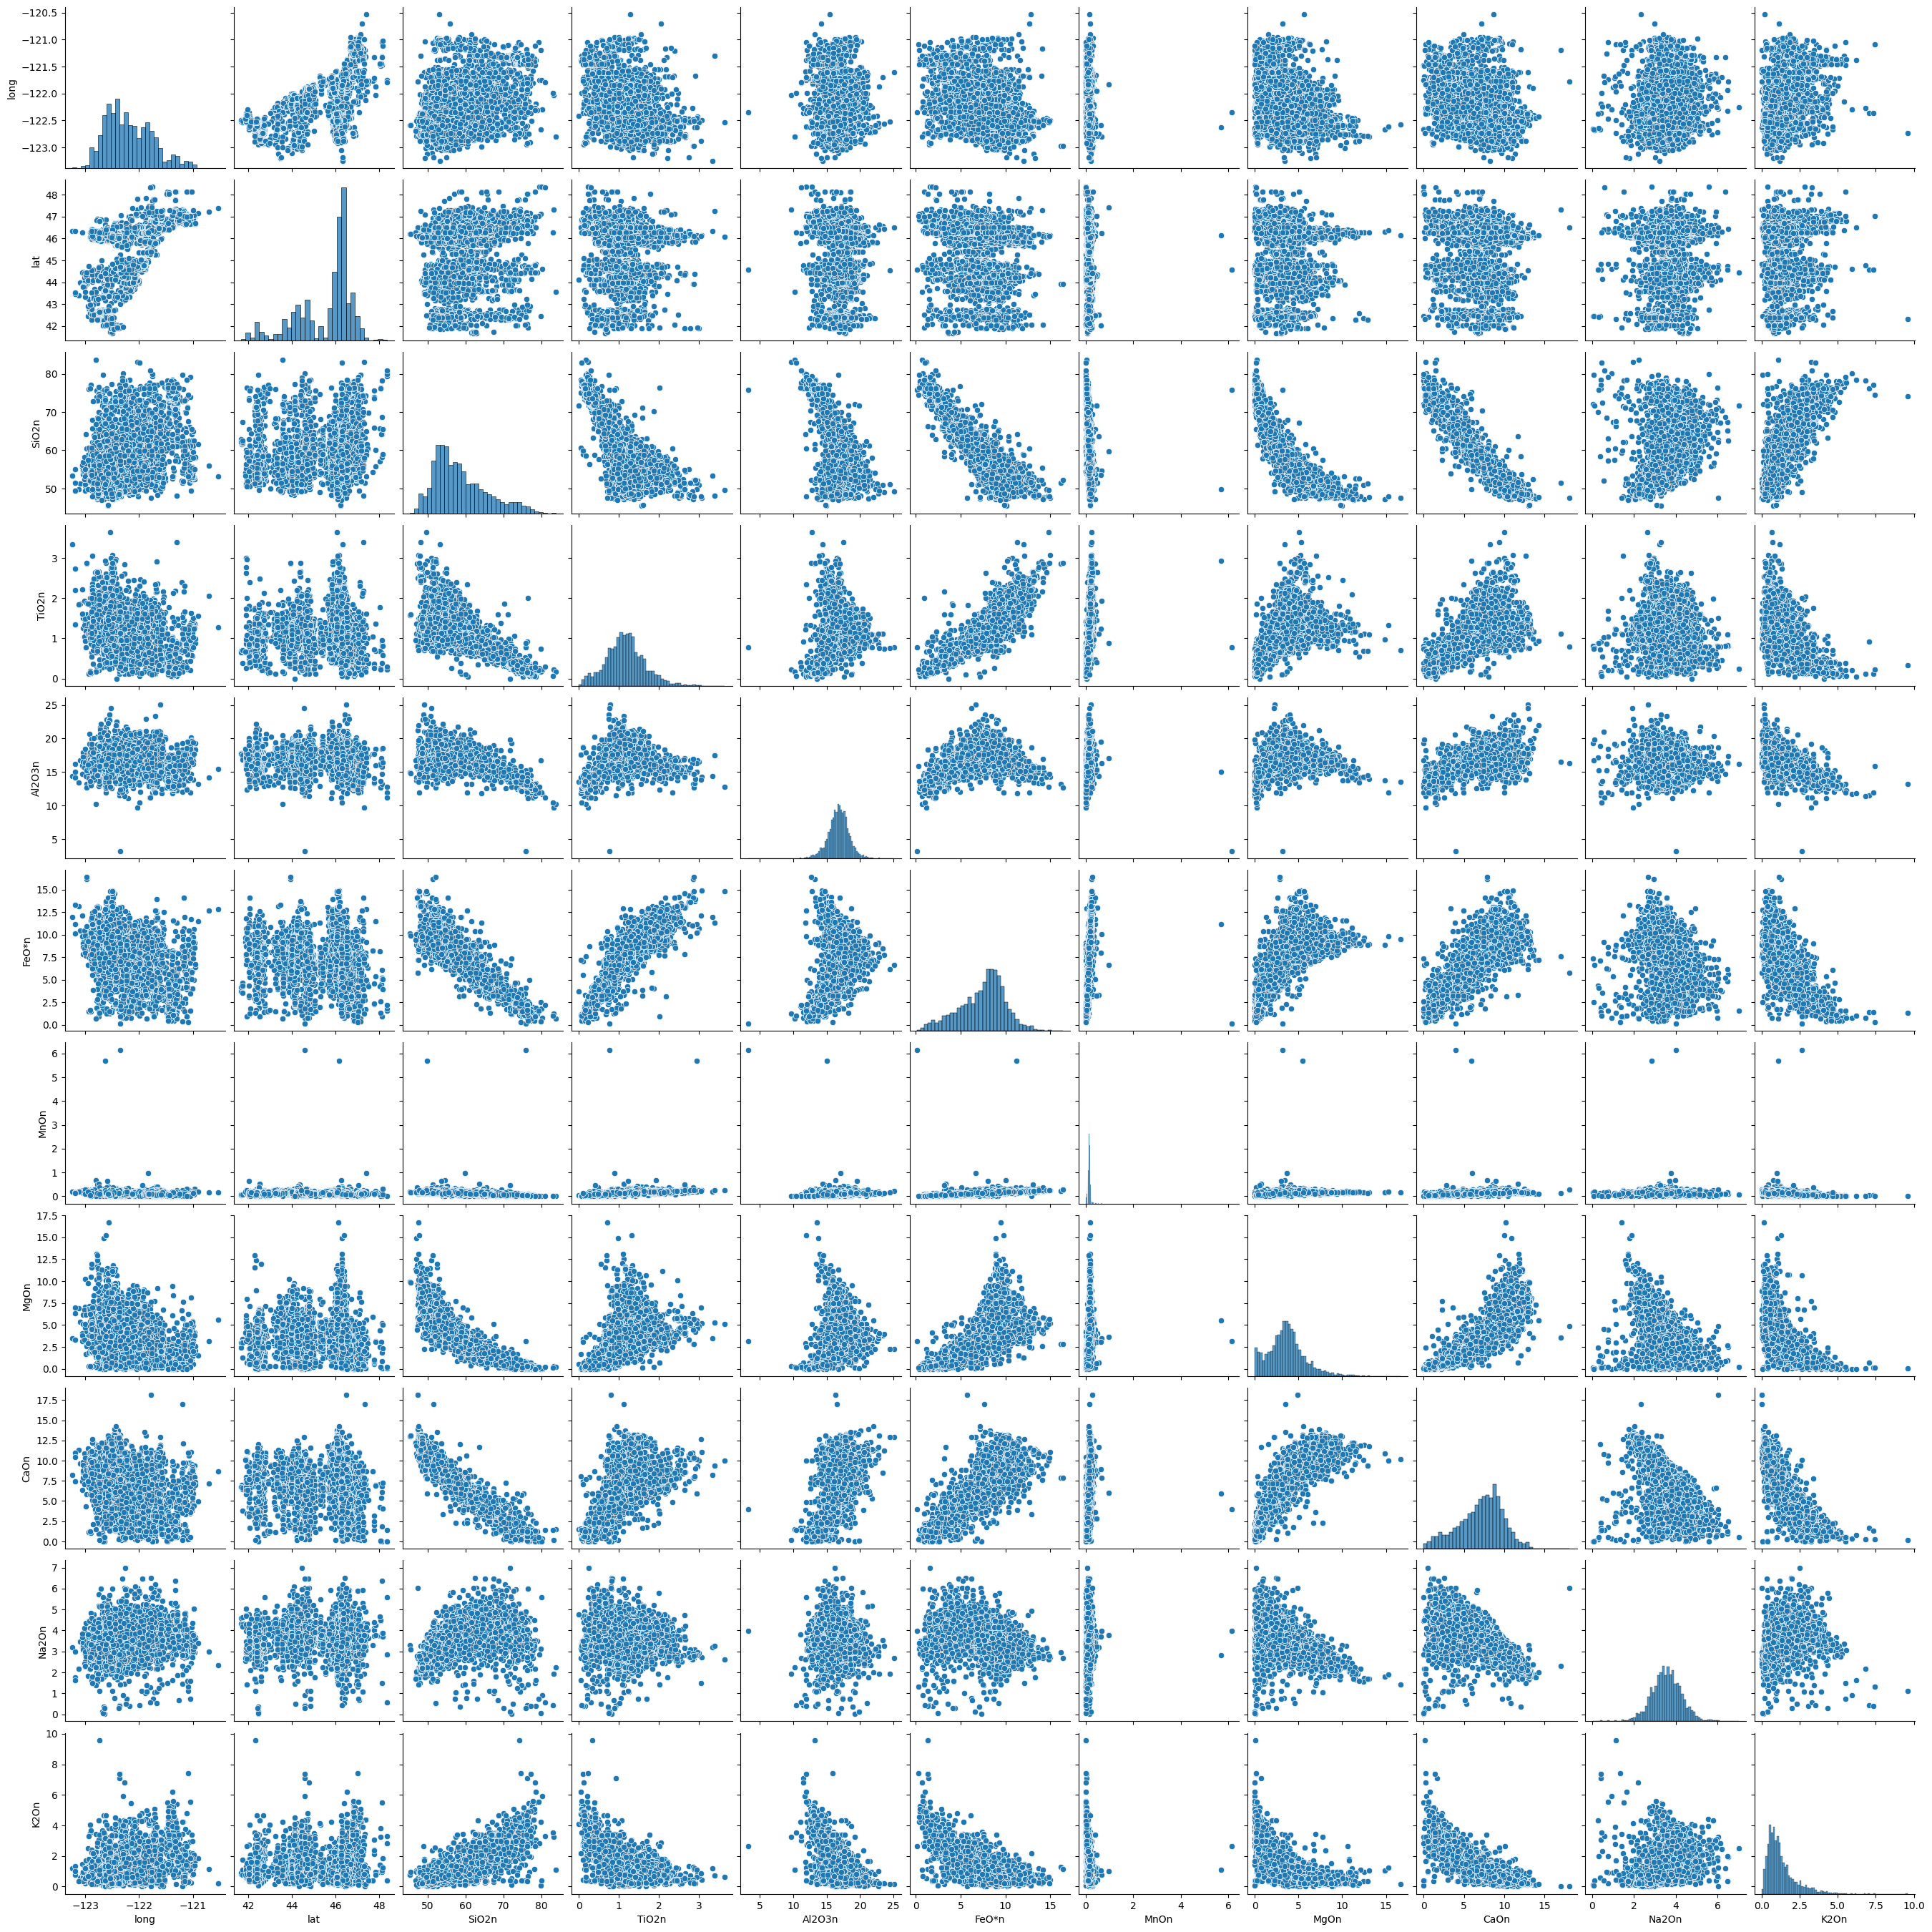

In [39]:
numeric_columns = data_cleaned.select_dtypes(include='number').columns
sns.pairplot(data_cleaned[numeric_columns])
plt.show()

In [40]:
correlation_matrix = data_cleaned.corr(numeric_only=True)

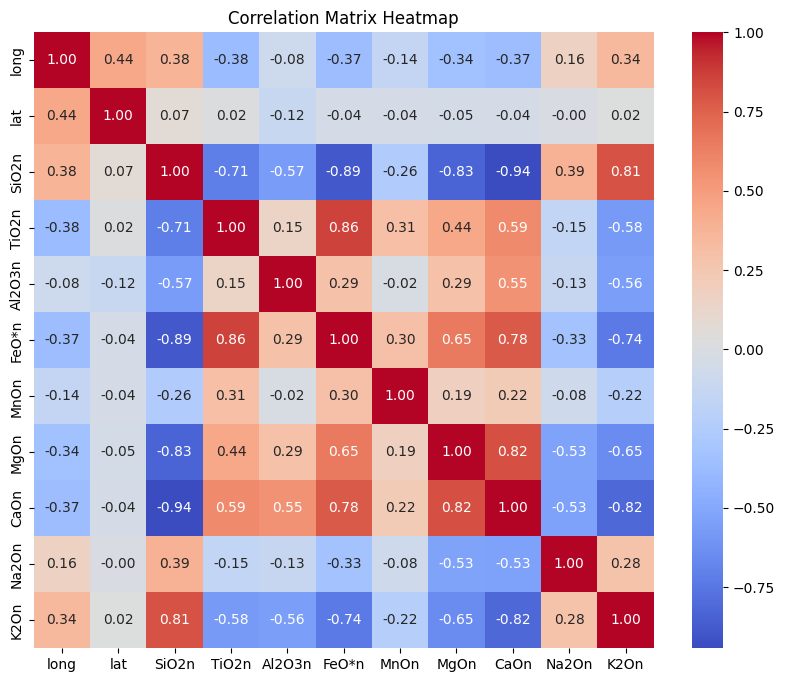

In [41]:
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

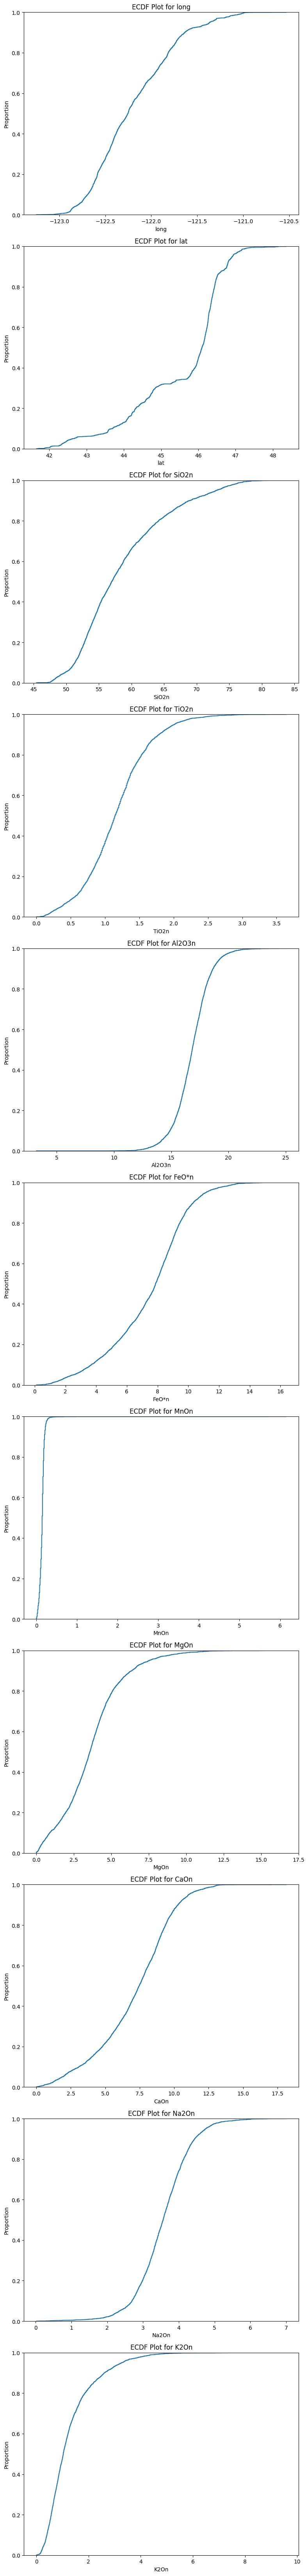

In [45]:
numeric_columns = data_cleaned.select_dtypes(include='number').columns
# Create ECDF plots for all numerical variables
fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(8, 6 * len(numeric_columns))) # Create subplots

for i, column in enumerate(numeric_columns):
    sns.ecdfplot(data=data_cleaned, x=column, ax=axes[i])  # Plot ECDF on the subplot
    axes[i].set_title(f"ECDF Plot for {column}")  # Set title for each subplot

plt.tight_layout()  # Adjust subplot spacing to prevent overlap
plt.show()